EXTRACTING THE DETAILS FROM A PDF FILE SUCH AS AN ID CARD

ID Card Used ===> Driving Licence

------ Details to Extract -----

Photo, 
Licence No, 
Name, 
S/W/D (Relation's Name), 
Address, 
Date of Birth, 
Blood Group, 
Validity from, 
Validity upto

In [186]:
# Importing necessary libraries

from pdf2image import convert_from_path
import matplotlib.pyplot as plt 
import numpy as np
import cv2 
import pytesseract
import re

In [187]:
# importing the aadhaar pdf and converting the main page (first paage) to a jpeg file

licence = convert_from_path("Driving Licence.pdf", fmt="jpeg")[0]

In [188]:
# converting the jpeg file to an array

licence_img = np.array(licence)
licence_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [189]:
# reading the haarcascade file using CascadeClassifier

face_data = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
face_data

< cv2.CascadeClassifier 0x156324db0>

In [190]:
# detecting the face using detectMultiScale

faces = face_data.detectMultiScale(licence_img, minNeighbors = 4)
faces


array([[198, 217, 215, 215]], dtype=int32)

In [191]:
# to draw the rectangular bounding box

for (x, y, h, w) in faces:
    cv2.rectangle(licence_img, (x,y), (x+h, y+w), (0,0,255), 4)

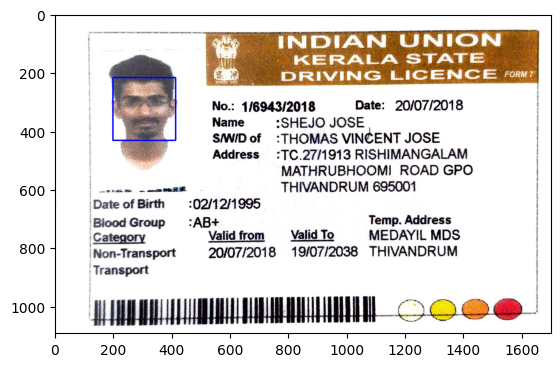

In [192]:
plt.imshow(licence_img)

In [193]:
# extracting the face 

face=licence_img[y:y+h,x:x+w] # rows, columns
face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [255, 255, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [194]:
# saving the face file as jpg formmat

face_name = "face"                  # let's give file name as face
cv2.imwrite(f"{face_name}.jpg",face) 

True

In [195]:
# print the text in the pdf

text = pytesseract.image_to_string(licence_img)
print(text)

INDIAN UNION
KERALA STATE

DRIVING LICENCE ormr

No.: 1/6943/2018 Date: 20/07/2018
Name :SHEJO JOSE

SMWID of |: THOMAS VINCENT JOSE
Address :TC.27/1913 RISHIMANGALAM
! MATHRUBHOOM! ROAD GPO
| castes, asin. THIVANDRUM 695001

‘Date of Birth 02/12/1995
‘Blood Group :AB+t Temp. Address
‘Category Valid from = Valid To MEDAYIL MDS

iNon-Transport 20/07/2018 19/07/2038 THIVANDRUM
‘Transport

monn ee




In [196]:
# conversion into a dictionary with details such as left, top, width, height, conf, text, etc.

dic = pytesseract.image_to_data(licence_img,  output_type=pytesseract.Output.DICT)
dic["text"]

['',
 '',
 '',
 '',
 'INDIAN',
 'UNION',
 '',
 'KERALA',
 'STATE',
 '',
 '',
 '',
 'DRIVING',
 'LICENCE',
 'ormr',
 '',
 '',
 '',
 '   ',
 '',
 '',
 '',
 '  ',
 '  ',
 '',
 ' ',
 '',
 '',
 '',
 'No.:',
 '1/6943/2018',
 'Date:',
 '20/07/2018',
 '',
 'Name',
 ':SHEJO',
 'JOSE',
 '',
 '',
 'SMWID',
 'of',
 '|:',
 'THOMAS',
 'VINCENT',
 'JOSE',
 '',
 'Address',
 ':TC.27/1913',
 'RISHIMANGALAM',
 '',
 '!',
 'MATHRUBHOOM!',
 'ROAD',
 'GPO',
 '',
 '|',
 'castes,',
 'asin.',
 'THIVANDRUM',
 '695001',
 '',
 '',
 '',
 '‘Date',
 'of',
 'Birth',
 '02/12/1995',
 '',
 '‘Blood',
 'Group',
 ':AB+t',
 'Temp.',
 'Address',
 '',
 '‘Category',
 'Valid',
 'from',
 '=',
 'Valid',
 'To',
 'MEDAYIL',
 'MDS',
 '',
 '',
 '',
 'iNon-Transport',
 '20/07/2018',
 '19/07/2038',
 'THIVANDRUM',
 '',
 '‘Transport',
 '',
 '',
 '',
 'monn',
 'ee',
 '',
 '',
 '',
 '']

In [197]:
# Length of dic["text"]

text_len = len(dic["text"])
text_len

100

In [198]:
# Extraction of licence number

for i in range(text_len):
    if re.search(r"\d{1}/\d{4}/\d{4}",dic["text"][i]):
        licence_no = dic["text"][i]
        break

licence_no


'1/6943/2018'

In [199]:
# To extract Name, S/W/D, Address we can slice the data between the respective title and the next title

In [200]:
# Extraction of Name

for i in range(text_len):
    match = re.search("Name",dic["text"][i])
    if match:
        name_index = i
        break

name=""
for i in range(name_index+1, text_len):
    if re.search("SMWID", dic["text"][i]):
        break
    if dic["conf"][i]>-1:
        name+= dic["text"][i] + " "


if re.search(":", name[0]) :              # in case : comes along with the start of address, we need to strip it off
    name = name[1:-1]                        # removal of extra space at the end can also be removed
else:
    name = name[:-1]

name

'SHEJO JOSE'

In [201]:
# Extraction of S/W/D

for i in range(text_len):
    match = re.search("SMWID|S/W/D",dic["text"][i])
    if match:
        relation_index = i
        break


relation = ""

for i in range(relation_index+1,len(dic["text"])):
    if dic["text"][relation_index+1] == "of":
        relation = relation[1:]
    if re.search("Address", dic["text"][i]):
        break
    if dic["conf"][i]>-1:
        relation+= dic["text"][i] + " "

if re.search(":", relation[0]) :              
    relation = relation[1:-1]        
else:
    relation = relation[:-1]

relation

'THOMAS VINCENT JOSE'

In [202]:
# Extraction of Address

for i in range(text_len):
    match = re.search("Address",dic["text"][i])
    if match:
        address_index = i
        break

address = ""
for i in range(address_index+1,len(dic["text"])):
    if re.search("Date", dic["text"][i]):
        break
    if dic["conf"][i]>50:
        address+= dic["text"][i] + " "

if re.search(":", address[0]) :              
    address = address[1:-1]        
else:
    address = address[:-1]

address

'TC.27/1913 RISHIMANGALAM ! MATHRUBHOOM! ROAD GPO | THIVANDRUM 695001'

In [203]:
# Note: We have 4 dates in driving license but we are interested only on dob, valid from and valid to

# Extraction of dob, valid_from, valid_to

dates = []
for i in range(text_len):
    if re.search(r"\d{1,2}/\d{1,2}/\d{4}",dic["text"][i]):
        dates.append(dic["text"][i])

dob = dates[1]
valid_from = dates[2]
valid_to = dates[3]

print(dob)
print(valid_from)
print(valid_to)


02/12/1995
20/07/2018
19/07/2038


In [204]:
# Extraction of Blood group

for i in range(text_len):
    match = re.search(r"\b(A|B|AB|O)[+-]\b",dic["text"][i])
    if match :
        blood_group = match.group()

blood_group

'AB+'

In [205]:
# Now let us convert the details into a dictionary

id_card = {
    "Licence No" : licence_no,
    "Photo_filename" : f"{face_name}.jpg",
    "Name" : name,
    "S/W/D" : relation,
    "Address" : address,
    "Date of Birth" : dob,
    "Blood Group" : blood_group,
    "Validity from" : valid_from,
    "Validity upto" : valid_to   
}



In [206]:
id_card

{'Licence No': '1/6943/2018',
 'Photo_filename': 'face.jpg',
 'Name': 'SHEJO JOSE',
 'S/W/D': 'THOMAS VINCENT JOSE',
 'Address': 'TC.27/1913 RISHIMANGALAM ! MATHRUBHOOM! ROAD GPO | THIVANDRUM 695001',
 'Date of Birth': '02/12/1995',
 'Blood Group': 'AB+',
 'Validity from': '20/07/2018',
 'Validity upto': '19/07/2038'}

In [207]:
# Convertion to JSON and saving as a JSON file
import json

with open("id_card.json", "w") as json_file:
    json.dump(id_card, json_file, indent=4)